In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,r2_score,accuracy_score,f1_score,recall_score,precision_score,confusion_matrix

In [4]:
df=pd.read_csv('Iris.csv')
pd.set_option('display.max_rows',150)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
corr_matrix=df.corr()
corr_matrix

/tmp/ipykernel_4668/363827394.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

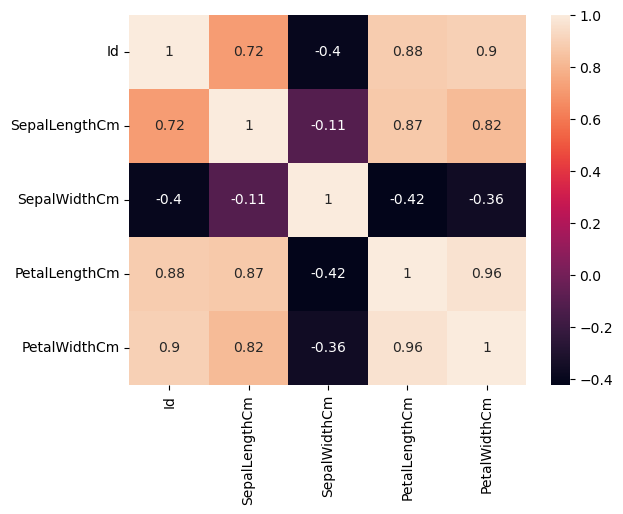

In [8]:
sns.heatmap(corr_matrix,annot=True)

In [19]:
x=df[['PetalLengthCm','PetalWidthCm']]
y=df['Species']
model=GaussianNB()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=85)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
report=classification_report(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred,average='micro')
f1=f1_score(y_test,y_pred,average='micro')
precision=precision_score(y_test,y_pred,average='micro')

In [20]:
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [21]:
f1

0.9666666666666667

In [22]:
accuracy

0.9666666666666667

In [23]:
recall

0.9666666666666667

In [24]:
precision

0.9666666666666667

<AxesSubplot:>

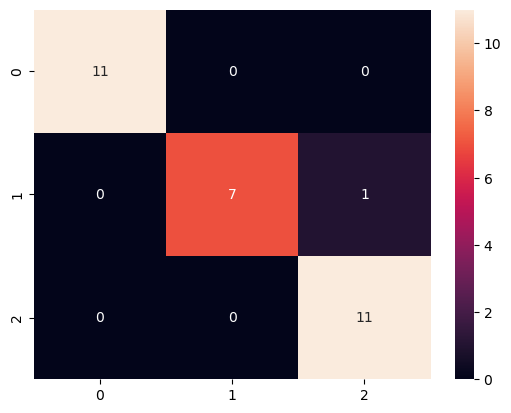

In [26]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)